In [ ]:
# 1. Uninstall existing installations
!pip uninstall opencv-python opencv-python-headless -y

# 2. Install full OpenCV with GUI support
!pip install opencv-python
!pip in


In [ ]:
!pip3 install pygame

In [ ]:
pip show pygame

In [10]:
# --------------------------
# Part 2: Robust Inference (Corrected)
# --------------------------
import cv2
import numpy as np
import tensorflow as tf
import json

class PostureAnalyzer:
    def __init__(self, model_path, img_size=(224, 224)):
        self.model = tf.keras.models.load_model(model_path)
        self.img_size = img_size
        
        # Load class names from JSON file
        with open('class_names.json', 'r') as f:
            self.class_names = json.load(f)
        
        # Set thresholds based on loaded class order
        self.class_thresholds = {
            self.class_names[0]: 0.65,  # First class
            self.class_names[1]: 0.50,  # Second class
            self.class_names[2]: 0.60   # Third class
        }
        self.prediction_history = []
        
    def analyze_frame(self, frame):
        resized = cv2.resize(frame, self.img_size)
        normalized = resized / 255.0
        
        prediction = self.model.predict(np.expand_dims(normalized, axis=0), verbose=0)[0]
        self.prediction_history = (self.prediction_history + [prediction])[-5:]
        
        avg_prediction = np.mean(self.prediction_history, axis=0)
        class_id = np.argmax(avg_prediction)
        confidence = avg_prediction[class_id]
        class_name = self.class_names[class_id]
        
        if confidence < self.class_thresholds[class_name] or len(self.prediction_history) < 3:
            return "Initializing...", 0.0
        return class_name, confidence

import cv2
import numpy as np
import tensorflow as tf

class PostureAnalyzer:
    def __init__(self, model_path, img_size=(224, 224)):
        self.model = tf.keras.models.load_model(model_path)
        self.class_names = ['looks good', 'sit up straight', 'straighten head']
        self.img_size = img_size
        self.class_thresholds = {
            'looks good': 0.65,
            'sit up straight': 0.50,
            'straighten head': 0.60
        }
        self.prediction_history = []
        
    def analyze_frame(self, frame):
        resized = cv2.resize(frame, self.img_size)
        normalized = resized / 255.0
        
        prediction = self.model.predict(np.expand_dims(normalized, axis=0), verbose=0)[0]
        self.prediction_history = (self.prediction_history + [prediction])[-5:]
        
        avg_prediction = np.mean(self.prediction_history, axis=0)
        class_id = np.argmax(avg_prediction)
        confidence = avg_prediction[class_id]
        class_name = self.class_names[class_id]
        
        if confidence < self.class_thresholds[class_name] or len(self.prediction_history) < 3:
            return "uncertain", 0.0
        return class_name, confidence

def main():
    analyzer = PostureAnalyzer('posture_model_v2.keras')
    
    cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
    if not cap.isOpened():
        print("Error: Webcam not accessible")
        return
    
    print("Real-time analysis started. Press Q to exit.")
    gui_enabled = True
    
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                print("Frame capture error")
                break
            
            # Corrected method call below ↓
            posture, confidence = analyzer.analyze_frame(frame)  # Fixed typo
            
            if posture == "looks good":
                color = (0, 255, 0)
            elif posture == "sit up straight":
                color = (0, 165, 255)
            elif posture == "straighten head":
                color = (0, 0, 255)
            else:
                color = (128, 128, 128)
            
            label = f"{posture} ({confidence*100:.1f}%)" if confidence > 0 else "Initializing..."
            
            if gui_enabled:
                try:
                    cv2.putText(frame, label, (10, 30), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)
                    cv2.imshow('Posture Analysis', frame)
                except:
                    gui_enabled = False
                    print("GUI disabled - running in terminal mode")
                    print(f"Current status: {label}")
            
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
                
    finally:
        cap.release()
        if gui_enabled:
            cv2.destroyAllWindows()

if __name__ == "__main__":
    main()


Real-time analysis started. Press Q to exit.


Found 1334 files belonging to 3 classes.
Using 1068 files for training.
Found 1334 files belonging to 3 classes.
Using 266 files for validation.
Epoch 1/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.3228 - loss: 3.4462 - val_accuracy: 0.1992 - val_loss: 1.1052
Epoch 2/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.4285 - loss: 3.1817 - val_accuracy: 0.1992 - val_loss: 1.1077
Epoch 3/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.4857 - loss: 3.1581 - val_accuracy: 0.1992 - val_loss: 1.1202
Epoch 4/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.5102 - loss: 3.0326 - val_accuracy: 0.1992 - val_loss: 1.1295
Epoch 5/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.5639 - loss: 2.9615 - val_accuracy: 0.1992 - val_loss: 1.1367
Epoch 6/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.5782 - loss: 2.8725 - val_accuracy: 0.1992 - val_loss: 1.1451


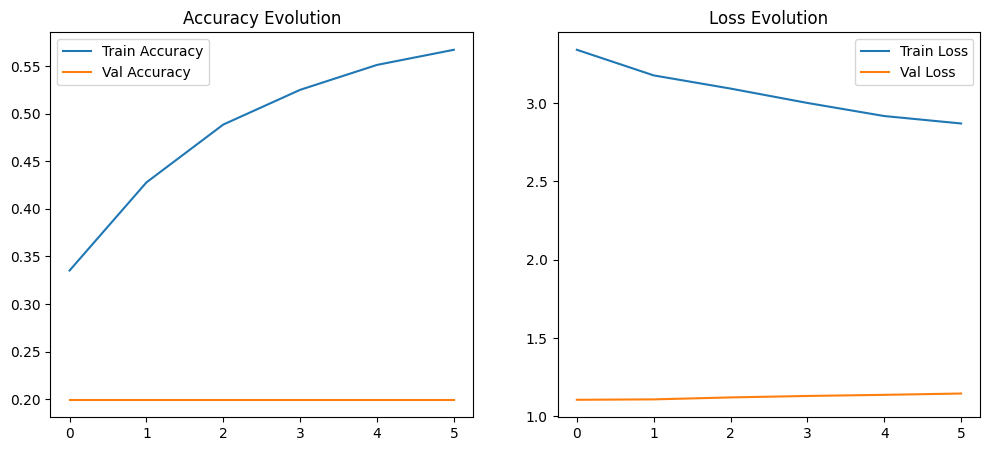

9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 381ms/step


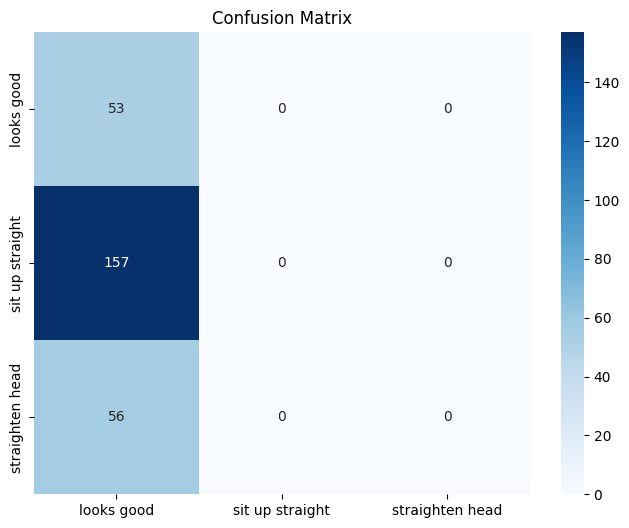

                 precision    recall  f1-score   support

     looks good       0.20      1.00      0.33        53
sit up straight       1.00      0.00      0.00       157
straighten head       1.00      0.00      0.00        56

       accuracy                           0.20       266
      macro avg       0.73      0.33      0.11       266
   weighted avg       0.84      0.20      0.07       266



In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Configuration
train_dir = r"C:\Users\KIIT\Minor\train"
img_size = (224, 224)
batch_size = 32
epochs = 25

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.1),
])

# Load datasets
train_ds = image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='int'
)

val_ds = image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='int'
)

# Handle class imbalance
class_names = train_ds.class_names
class_counts = np.bincount(np.concatenate([y for x, y in train_ds]))
class_weights = {i: sum(class_counts)/count for i, count in enumerate(class_counts)}

# Enhanced Model Architecture
def create_model():
    model = models.Sequential([
        layers.Input(shape=(*img_size, 3)),
        data_augmentation,
        layers.Rescaling(1./255),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(3, activation='softmax')
    ])
    return model

model = create_model()
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Model training
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    class_weight=class_weights,
    callbacks=[early_stopping]
)

# Save the model
model.save('posture_model_v2.keras')

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Evolution')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Evolution')
plt.legend()
plt.show()

# Evaluate on validation set
val_images, val_labels = [], []
for images, labels in val_ds:
    val_images.append(images)
    val_labels.append(labels)
val_images = np.concatenate(val_images)
val_labels = np.concatenate(val_labels)

# Predictions
predictions = model.predict(val_images)
pred_labels = np.argmax(predictions, axis=1)

# Confusion Matrix
conf_mat = confusion_matrix(val_labels, pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(val_labels, pred_labels, target_names=class_names, zero_division=1))


In [4]:
class_names = train_ds.class_names  # Dynamically set from folder names

In [5]:
POSTURE_THRESHOLDS = {
    'neck_angle': 175,  # Increase for stricter neck alignment
    'back_angle': 160,  # Decrease for more relaxed back posture
    'hip_angle': 170    # Adjust for different hip alignment needs
}

In [3]:
import cv2
import numpy as np
from ultralytics import YOLO
import mediapipe as mp

# Initialize YOLOv8 for person detection
model = YOLO("yolov8n-pose.pt")  # Using pose estimation model

# Initialize MediaPipe for detailed pose analysis
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Posture configuration
POSTURE_THRESHOLDS = {
    'neck_angle_lower': 148,  # Minimum acceptable neck angle
    'neck_angle_upper': 168.9,   # Degrees for neutral neck position
    'back_angle': 160,  # Degrees for straight back
    'hip_angle': 170    # Degrees for proper hip alignment
}

def calculate_angle(a, b, c):
    """Calculate angle between three points in degrees"""
    ba = a - b
    bc = c - b
    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc) + 1e-6)  # Prevent division by zero
    return np.degrees(np.arccos(np.clip(cosine_angle, -1.0, 1.0)))

def analyze_posture(landmarks):
    """Analyze posture using key body angles"""
    try:
        LEFT_SHOULDER = mp_pose.PoseLandmark.LEFT_SHOULDER.value
        RIGHT_SHOULDER = mp_pose.PoseLandmark.RIGHT_SHOULDER.value
        LEFT_EAR = mp_pose.PoseLandmark.LEFT_EAR.value
        LEFT_HIP = mp_pose.PoseLandmark.LEFT_HIP.value
        RIGHT_HIP = mp_pose.PoseLandmark.RIGHT_HIP.value
        LEFT_KNEE = mp_pose.PoseLandmark.LEFT_KNEE.value
        LEFT_ANKLE = mp_pose.PoseLandmark.LEFT_ANKLE.value

        points = {mark: np.array([landmarks[mark].x, landmarks[mark].y])
                  for mark in [LEFT_SHOULDER, RIGHT_SHOULDER, LEFT_EAR, LEFT_HIP, RIGHT_HIP, LEFT_KNEE, LEFT_ANKLE]}

        neck_angle = calculate_angle(points[LEFT_EAR], (points[LEFT_SHOULDER] + points[RIGHT_SHOULDER]) / 2,
                                     (points[LEFT_HIP] + points[RIGHT_HIP]) / 2)
        back_angle = calculate_angle(points[LEFT_SHOULDER], points[LEFT_HIP], points[LEFT_KNEE])
        hip_angle = calculate_angle(points[LEFT_SHOULDER], points[LEFT_HIP], points[LEFT_ANKLE])

        posture_status = {
            'neck': 'straighten head' if (neck_angle < POSTURE_THRESHOLDS['neck_angle_lower'] or
                                          neck_angle > POSTURE_THRESHOLDS['neck_angle_upper']) else 'good',
            'back': 'sit up straight' if back_angle < POSTURE_THRESHOLDS['back_angle'] else 'good',
            'hip': 'adjust hips' if hip_angle < POSTURE_THRESHOLDS['hip_angle'] else 'good'
        }

        return posture_status, {'neck': neck_angle, 'back': back_angle, 'hip': hip_angle}

    except Exception as e:
        print(f"Posture analysis error: {str(e)}")
        return None, None

def process_frame(frame):
    results = model(frame, verbose=False)
    annotated_frame = results[0].plot()

    for result in results:
        if result.boxes is not None:
            for box in result.boxes:
                if int(box.cls) == 0:  # Class 0 is 'person'
                    x1, y1, x2, y2 = map(int, box.xyxy[0])
                    person_roi = frame[y1:y2, x1:x2]

                    results_pose = pose.process(cv2.cvtColor(person_roi, cv2.COLOR_BGR2RGB))

                    if results_pose.pose_landmarks:
                        posture_status, angles = analyze_posture(results_pose.pose_landmarks.landmark)

                        if posture_status:
                            y_offset = y1 + 20
                            for line in [
                                f"Neck: {posture_status['neck']} ({angles['neck']:.1f}°)",
                                f"Back: {posture_status['back']} ({angles['back']:.1f}°)",
                                f"Hip: {posture_status['hip']} ({angles['hip']:.1f}°)"
                            ]:
                                cv2.putText(annotated_frame, line, (x1, y_offset),
                                            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
                                y_offset += 30

    return annotated_frame

def main():
    cap = cv2.VideoCapture(0)

    while cap.isOpened():
        success, frame = cap.read()
        if not success:
            break

        processed_frame = process_frame(frame)
        cv2.imshow("Posture Analysis", processed_frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    main()
